In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Yapay Zeka ve Teknoloji Akademisi/Veri Bilimi ve Makina Öğrenmesi (Udemy)/5-Makina Öğrenmesi/7-Ensemble Learning Methods/2- Boosting/concrete_data.csv')

In [ ]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [ ]:
df.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Strength'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [ ]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [ ]:
df.isnull().sum()

,0
Cement,0
Blast Furnace Slag,0
Fly Ash,0
Water,0
Superplasticizer,0
Coarse Aggregate,0
Fine Aggregate,0
Age,0
Strength,0


#EDA

In [ ]:
df.corr()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
Cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
Blast Furnace Slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
Fly Ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
Water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
Superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
Coarse Aggregate,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
Fine Aggregate,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
Age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
Strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


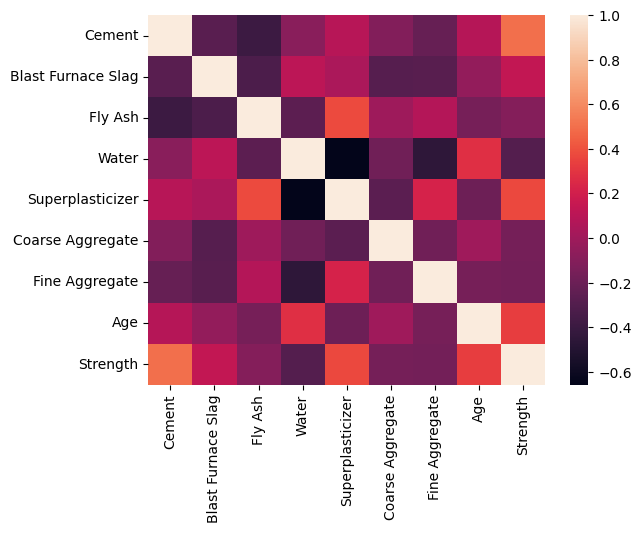

In [ ]:
sns.heatmap(df.corr())
plt.show()

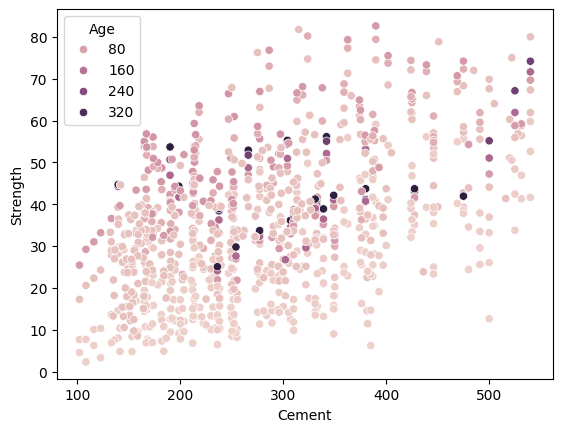

In [ ]:
sns.scatterplot(data = df, x = "Cement", y = "Strength", hue= "Age")
plt.show()

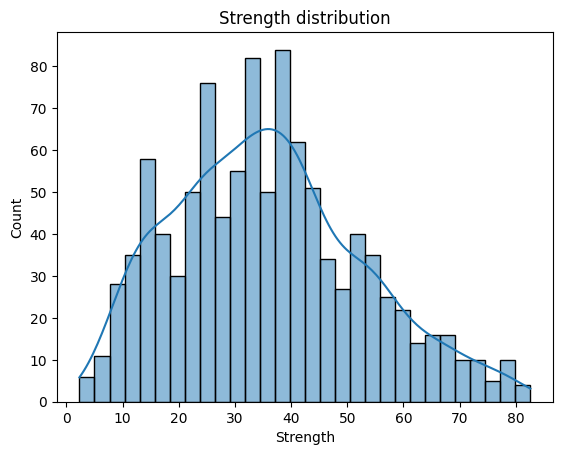

In [ ]:
sns.histplot(df["Strength"], bins=30, kde=True); plt.title("Strength distribution"); plt.show()
plt.show()

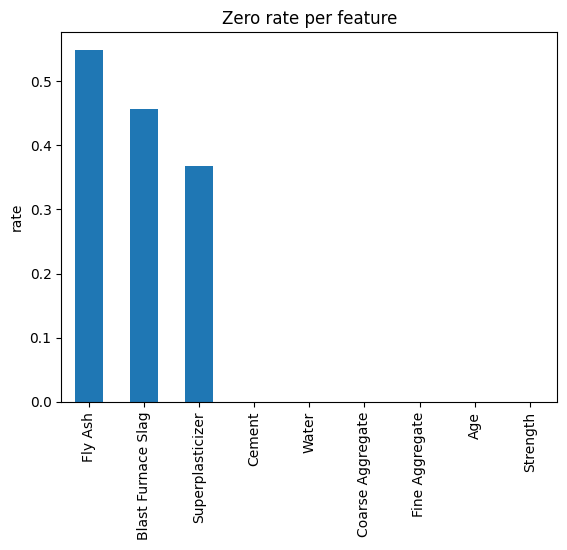

In [ ]:
((df==0).mean().sort_values(ascending=False)).plot(kind="bar"); plt.title("Zero rate per feature"); plt.ylabel("rate"); plt.show()
plt.show()

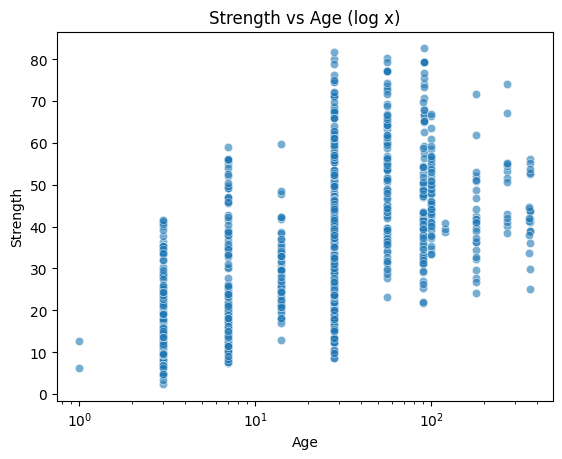

In [ ]:
sns.scatterplot(x=df["Age"], y=df["Strength"], alpha=.6); plt.xscale("log"); plt.title("Strength vs Age (log x)"); plt.show()
plt.show()

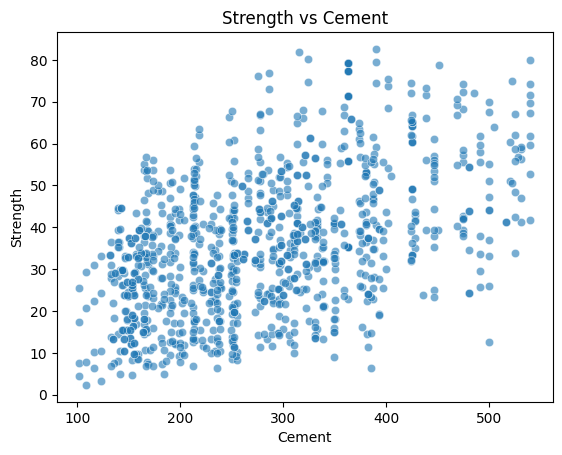

In [ ]:
sns.scatterplot(x=df["Cement"], y=df["Strength"], alpha=.6); plt.title("Strength vs Cement"); plt.show()
plt.show()

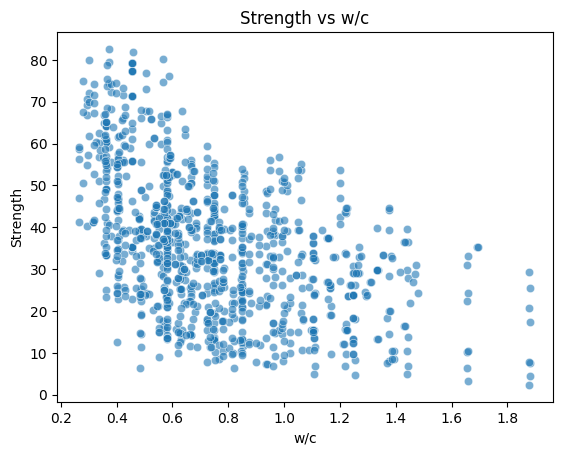

In [ ]:
sns.scatterplot(x=df["Water"]/df["Cement"], y=df["Strength"], alpha=.6); plt.title("Strength vs w/c"); plt.xlabel("w/c"); plt.show()
plt.show()

#Model

##Train-Test-Split

In [ ]:
X = df.drop("Strength", axis = 1)
y = df["Strength"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
X.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [ ]:
y.head()

,Strength
0,79.99
1,61.89
2,40.27
3,41.05
4,44.30


##Manuel Gradient Boosting

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
#First Weak learner
tree_reg1 = DecisionTreeRegressor(max_depth = 3)
tree_reg1.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [ ]:
y2 = y_train -tree_reg1.predict(X_train)

In [ ]:
y2[:5]

,Strength
995,2.765000
507,0.950179
334,8.148222
848,-5.317425
294,-8.251778


In [ ]:
#Second Weak Learner
tree_reg2 = DecisionTreeRegressor(max_depth = 4)
tree_reg2.fit(X_train, y2)

DecisionTreeRegressor(max_depth=4)

In [ ]:
y3 = y2 -tree_reg2.predict(X_train)
y3[:5]

,Strength
995,2.456058
507,7.533870
334,2.490710
848,-5.626367
294,-8.560719


In [ ]:
#Third Weak Learner
tree_reg3 = DecisionTreeRegressor(max_depth = 5)
tree_reg3.fit(X_train, y3)

DecisionTreeRegressor(max_depth=5)

In [ ]:
y4 = y3 - tree_reg3.predict(X_train)
y4[:5]

,Strength
995,2.005599
507,6.558762
334,-2.165149
848,-6.144332
294,-6.115797


In [ ]:
y_pred = sum(tree.predict(X_test) for tree in (tree_reg1, tree_reg2, tree_reg3))

In [ ]:
y_pred

array([53.1342661 , 55.15023615, 68.33108992, 41.11901978, 16.82042421,
       49.91181126, 15.73915386, 55.26038203, 41.93001507, 37.14729108,
       45.57267997, 10.34877998, 35.1718005 , 35.32726966, 24.40687608,
       17.0021302 , 37.51474959, 23.06121734, 39.54433162, 27.30225845,
       35.9467558 , 35.08004623, 48.41041318, 16.63077621, 27.30225845,
       55.26038203,  6.62316376, 52.46531293, 44.82539744, 13.72394518,
       50.84556778, 31.75605621, 46.88727176, 55.26038203, 16.41117908,
       46.12817947, 41.93001507, 49.91181126,  7.45339762, 48.41041318,
       16.08176169,  7.45339762, 48.58439002, 58.51737723,  9.14719214,
       74.38681635, 58.51737723, 32.74138312, 27.35014825, 14.25250591,
       50.35460183, 51.47977238, 21.68637314, 17.0021302 , 38.6445954 ,
       41.11901978, 29.75544684, 16.08176169, 35.08004623, 19.42292171,
       49.91181126, 13.72394518, 28.04018115, 49.20301688, 23.47918013,
       32.58419372, 39.54433162, 15.88638598, 28.04018115, 26.46

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_test, y_pred)

0.7918953060438989

In [ ]:
tree_reg4 = DecisionTreeRegressor(max_depth = 4)
tree_reg4.fit(X_train, y4)

DecisionTreeRegressor(max_depth=4)

In [ ]:
y_pred = sum(tree.predict(X_test) for tree in (tree_reg1, tree_reg2, tree_reg3, tree_reg4))

In [ ]:
r2_score(y_test, y_pred)

0.8150314119751582

##Sklearn Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
gbr = GradientBoostingRegressor(max_depth = 3, n_estimators = 100, learning_rate = 0.1)
gbr.fit(X_train, y_train)

GradientBoostingRegressor()

In [ ]:
y_pred = gbr.predict(X_test)
r2_score(y_test, y_pred)

0.8828887569171389

###Hyperparameter Tuning

In [ ]:
params = {
    "n_estimators" : [100,150,200,250,300],
    "max_depth": [3,4,5,6,7],
    "loss": ["squared_error", "absolute_error", "huber", "quantile"],
    "learning_rate" : [0.01, 0.1, 0.5]
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rscv = RandomizedSearchCV(estimator = GradientBoostingRegressor(), param_distributions = params, cv = 3)

In [ ]:
rscv.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=GradientBoostingRegressor(),
                   param_distributions={'learning_rate': [0.01, 0.1, 0.5],
                                        'loss': ['squared_error',
                                                 'absolute_error', 'huber',
                                                 'quantile'],
                                        'max_depth': [3, 4, 5, 6, 7],
                                        'n_estimators': [100, 150, 200, 250,
                                                         300]})

In [ ]:
rscv.best_params_

{'n_estimators': 200, 'max_depth': 5, 'loss': 'huber', 'learning_rate': 0.1}

In [ ]:
y_pred = rscv.predict(X_test)
r2_score(y_test, y_pred)

0.9192925495614147